## Credit Fraud Application Project


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Evaluating machine learning models, maintaining performance of model after retraining with new data


### 2) Data Collection
- From: Bank Account Fraud Dataset Suite (NeurIPS 2022)
- Dataset Source - https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data 

Each dataset is composed of:
- 1 million instances;
- 30 realistic features used in the fraud detection use-case;
- A column of “month”, providing temporal information about the dataset;
- Protected attributes, (age group, employment status and % income).

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore') 
from catboost import CatBoostClassifier
import dask 

In [44]:
RANDOM_STATE = 42

In [45]:
# cd Credit_Fraud_endToEnd

## 1. Load and Read data

In [46]:
df = pd.read_csv('artifacts/raw/test.csv')

#### 1.1 Show Top 5 Records

In [47]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.7,0.559248,11,0,20,4.849171,-1.177439,AC,466,...,0,1000.0,0,INTERNET,1.751287,other,1,1,0,7
1,0,0.9,0.175046,115,13,50,0.014934,-1.053090,AC,531,...,0,200.0,0,INTERNET,0.678599,linux,1,1,0,7
2,0,0.8,0.644048,-1,55,30,0.022027,-1.028263,AB,1589,...,0,200.0,0,INTERNET,5.947965,other,0,1,0,7
3,0,0.6,0.580471,-1,53,30,0.000896,-1.209908,AB,1792,...,1,1500.0,0,INTERNET,3.843488,windows,0,1,0,7
4,0,0.9,0.150138,-1,66,40,0.000606,50.187050,AA,1869,...,0,200.0,0,INTERNET,2.879535,other,1,1,0,7


In [48]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

#### Shape of the dataset

In [49]:
df.shape

(9601, 32)

In [50]:
# Determin number of fraud cases and plot

fraud = df[df["fraud_bool"] == 1]
valid = df[df["fraud_bool"] == 0]

print(f"Fraud Applications: {len(fraud)} ")
print(f"Non Fraud Applications: {len(valid)}")
print(f"Fraud ratio: {len(fraud)/ len(df)}")

Fraud Applications: 158 
Non Fraud Applications: 9443
Fraud ratio: 0.016456619102176856


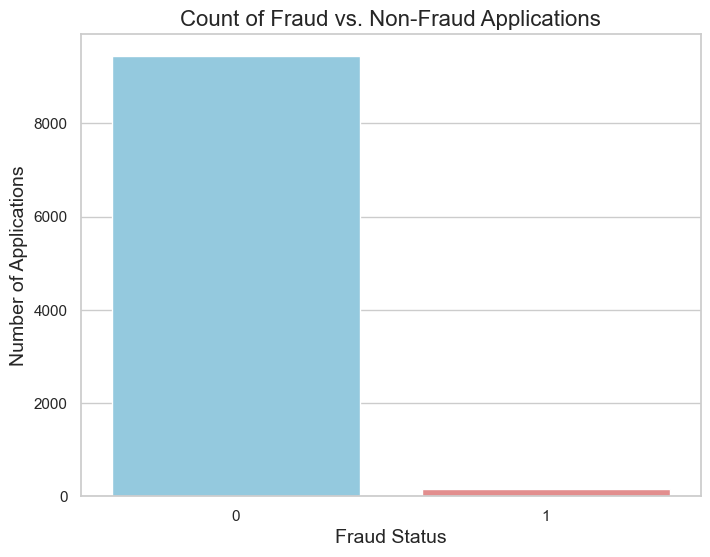

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='fraud_bool', data=df, palette=['skyblue', 'lightcoral'])

# Customize the plot
plt.title('Count of Fraud vs. Non-Fraud Applications', fontsize=16)
plt.xlabel('Fraud Status', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Show the plot
plt.show()


### 2.2 Dataset information

#### Read from datasheet.pdf

## 3. Data Quality Check

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [52]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [53]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [54]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601 entries, 0 to 9600
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        9601 non-null   int64  
 1   income                            9601 non-null   float64
 2   name_email_similarity             9601 non-null   float64
 3   prev_address_months_count         9601 non-null   int64  
 4   current_address_months_count      9601 non-null   int64  
 5   customer_age                      9601 non-null   int64  
 6   days_since_request                9601 non-null   float64
 7   intended_balcon_amount            9601 non-null   float64
 8   payment_type                      9601 non-null   object 
 9   zip_count_4w                      9601 non-null   int64  
 10  velocity_6h                       9601 non-null   float64
 11  velocity_24h                      9601 non-null   float64
 12  veloci

### 3.4 Checking the number of unique values of each column

In [55]:
df.nunique()

fraud_bool                             2
income                                 9
name_email_similarity               9601
prev_address_months_count            280
current_address_months_count         377
customer_age                           8
days_since_request                  9601
intended_balcon_amount              9601
payment_type                           4
zip_count_4w                        2349
velocity_6h                         9601
velocity_24h                        9601
velocity_4w                         9600
bank_branch_count_8w                 854
date_of_birth_distinct_emails_4w      29
employment_status                      7
credit_risk_score                    373
email_is_free                          2
housing_status                         7
phone_home_valid                       2
phone_mobile_valid                     2
bank_months_count                     29
has_other_cards                        2
proposed_credit_limit                 11
foreign_request 

### 3.5 Check statistics of data set

In [56]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,...,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.000000,9601.0,9601.0
mean,0.016457,0.622425,0.484152,21.741277,69.750026,32.530986,0.893648,5.655096,985.048953,3626.118108,...,0.899385,10.111238,0.192792,466.578481,0.021039,6.613213,0.646391,1.006770,0.0,7.0
std,0.127230,0.278475,0.275441,47.728029,78.034773,10.753377,5.692650,17.084196,657.365534,1996.836001,...,0.300833,12.108172,0.394512,438.723682,0.143523,7.525876,0.478115,0.108282,0.0,0.0
min,0.000000,0.100000,0.000120,-1.000000,-1.000000,10.000000,0.000001,-9.488343,3.000000,-14.547426,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,7.0
25%,0.000000,0.400000,0.247854,-1.000000,11.000000,20.000000,0.006971,-1.202730,560.000000,2294.172496,...,1.000000,-1.000000,0.000000,200.000000,0.000000,2.259912,0.000000,1.000000,0.0,7.0
50%,0.000000,0.700000,0.484518,-1.000000,39.000000,30.000000,0.014489,-0.878256,838.000000,3468.072296,...,1.000000,2.000000,0.000000,200.000000,0.000000,4.279189,1.000000,1.000000,0.0,7.0
75%,0.000000,0.900000,0.711083,29.000000,108.000000,40.000000,0.024128,-0.449509,1216.000000,4545.566892,...,1.000000,25.000000,0.000000,500.000000,0.000000,7.956293,1.000000,1.000000,0.0,7.0
max,1.000000,0.900000,0.999972,355.000000,386.000000,80.000000,75.246804,110.546116,6184.000000,15911.166588,...,1.000000,31.000000,1.000000,2100.000000,1.000000,68.603205,1.000000,2.000000,0.0,7.0


#### Insight
- Mean customer age is 33
- Some variables contains negative values, this indicate missing data that need to be processed

### 4. Features Analysis

In [57]:
# define numerical & categorical columns
num_features = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails_8w', 'device_fraud_count']


cat_features = ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid','phone_mobile_valid', 'has_other_cards'
                        , 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool', 'month']

# print columns
print('We have {} numerical features : {}'.format(len(cat_features), cat_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))

We have 13 numerical features : ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool', 'month']

We have 13 categorical features : ['payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'fraud_bool', 'month']


### 4.1 Numerical Features Analysis

#### Numerical Features Distribution 

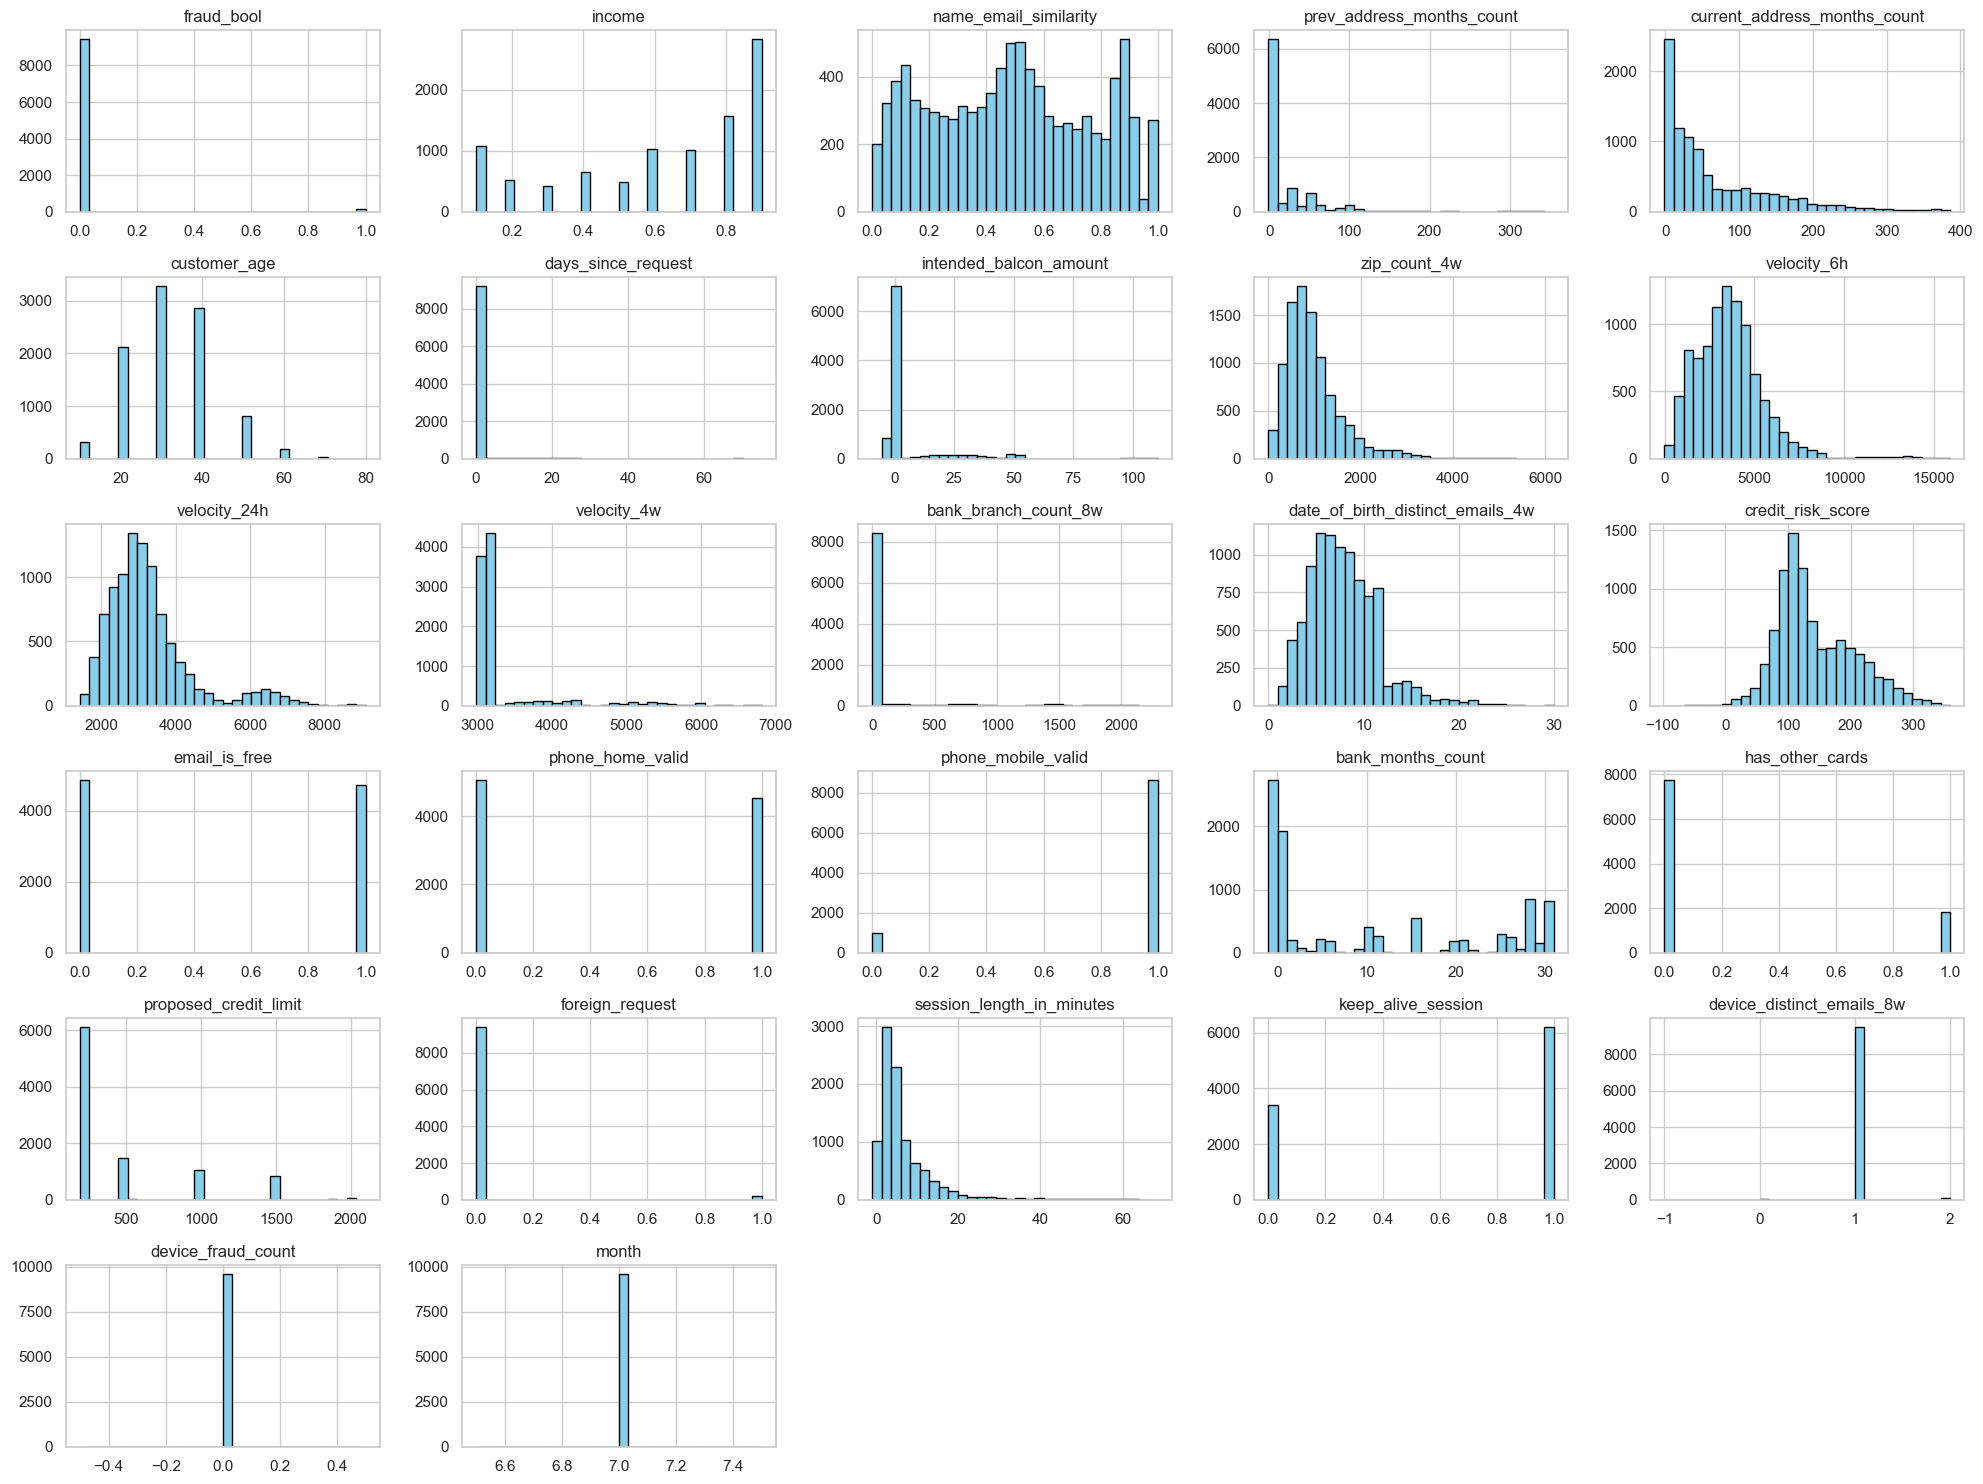

In [58]:
# Automatically plots histograms for all numerical columns
df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')

plt.tight_layout()  # Adjusts subplot params for a neat layout
plt.show()

#### Numerical Features Box Plot by Response type 

In [59]:
sample_frac = 0.5  # try 1%→10% and see tradeoff

sampled = df.groupby('fraud_bool', group_keys=False).apply(
    lambda g: g.sample(frac=sample_frac, random_state=RANDOM_STATE)
).reset_index(drop=True) # preserve class proportions


sampled['device_distinct_emails_8w']

0       1
1       1
2       1
3       1
4       1
       ..
4796    1
4797    1
4798    1
4799    1
4800    1
Name: device_distinct_emails_8w, Length: 4801, dtype: int64

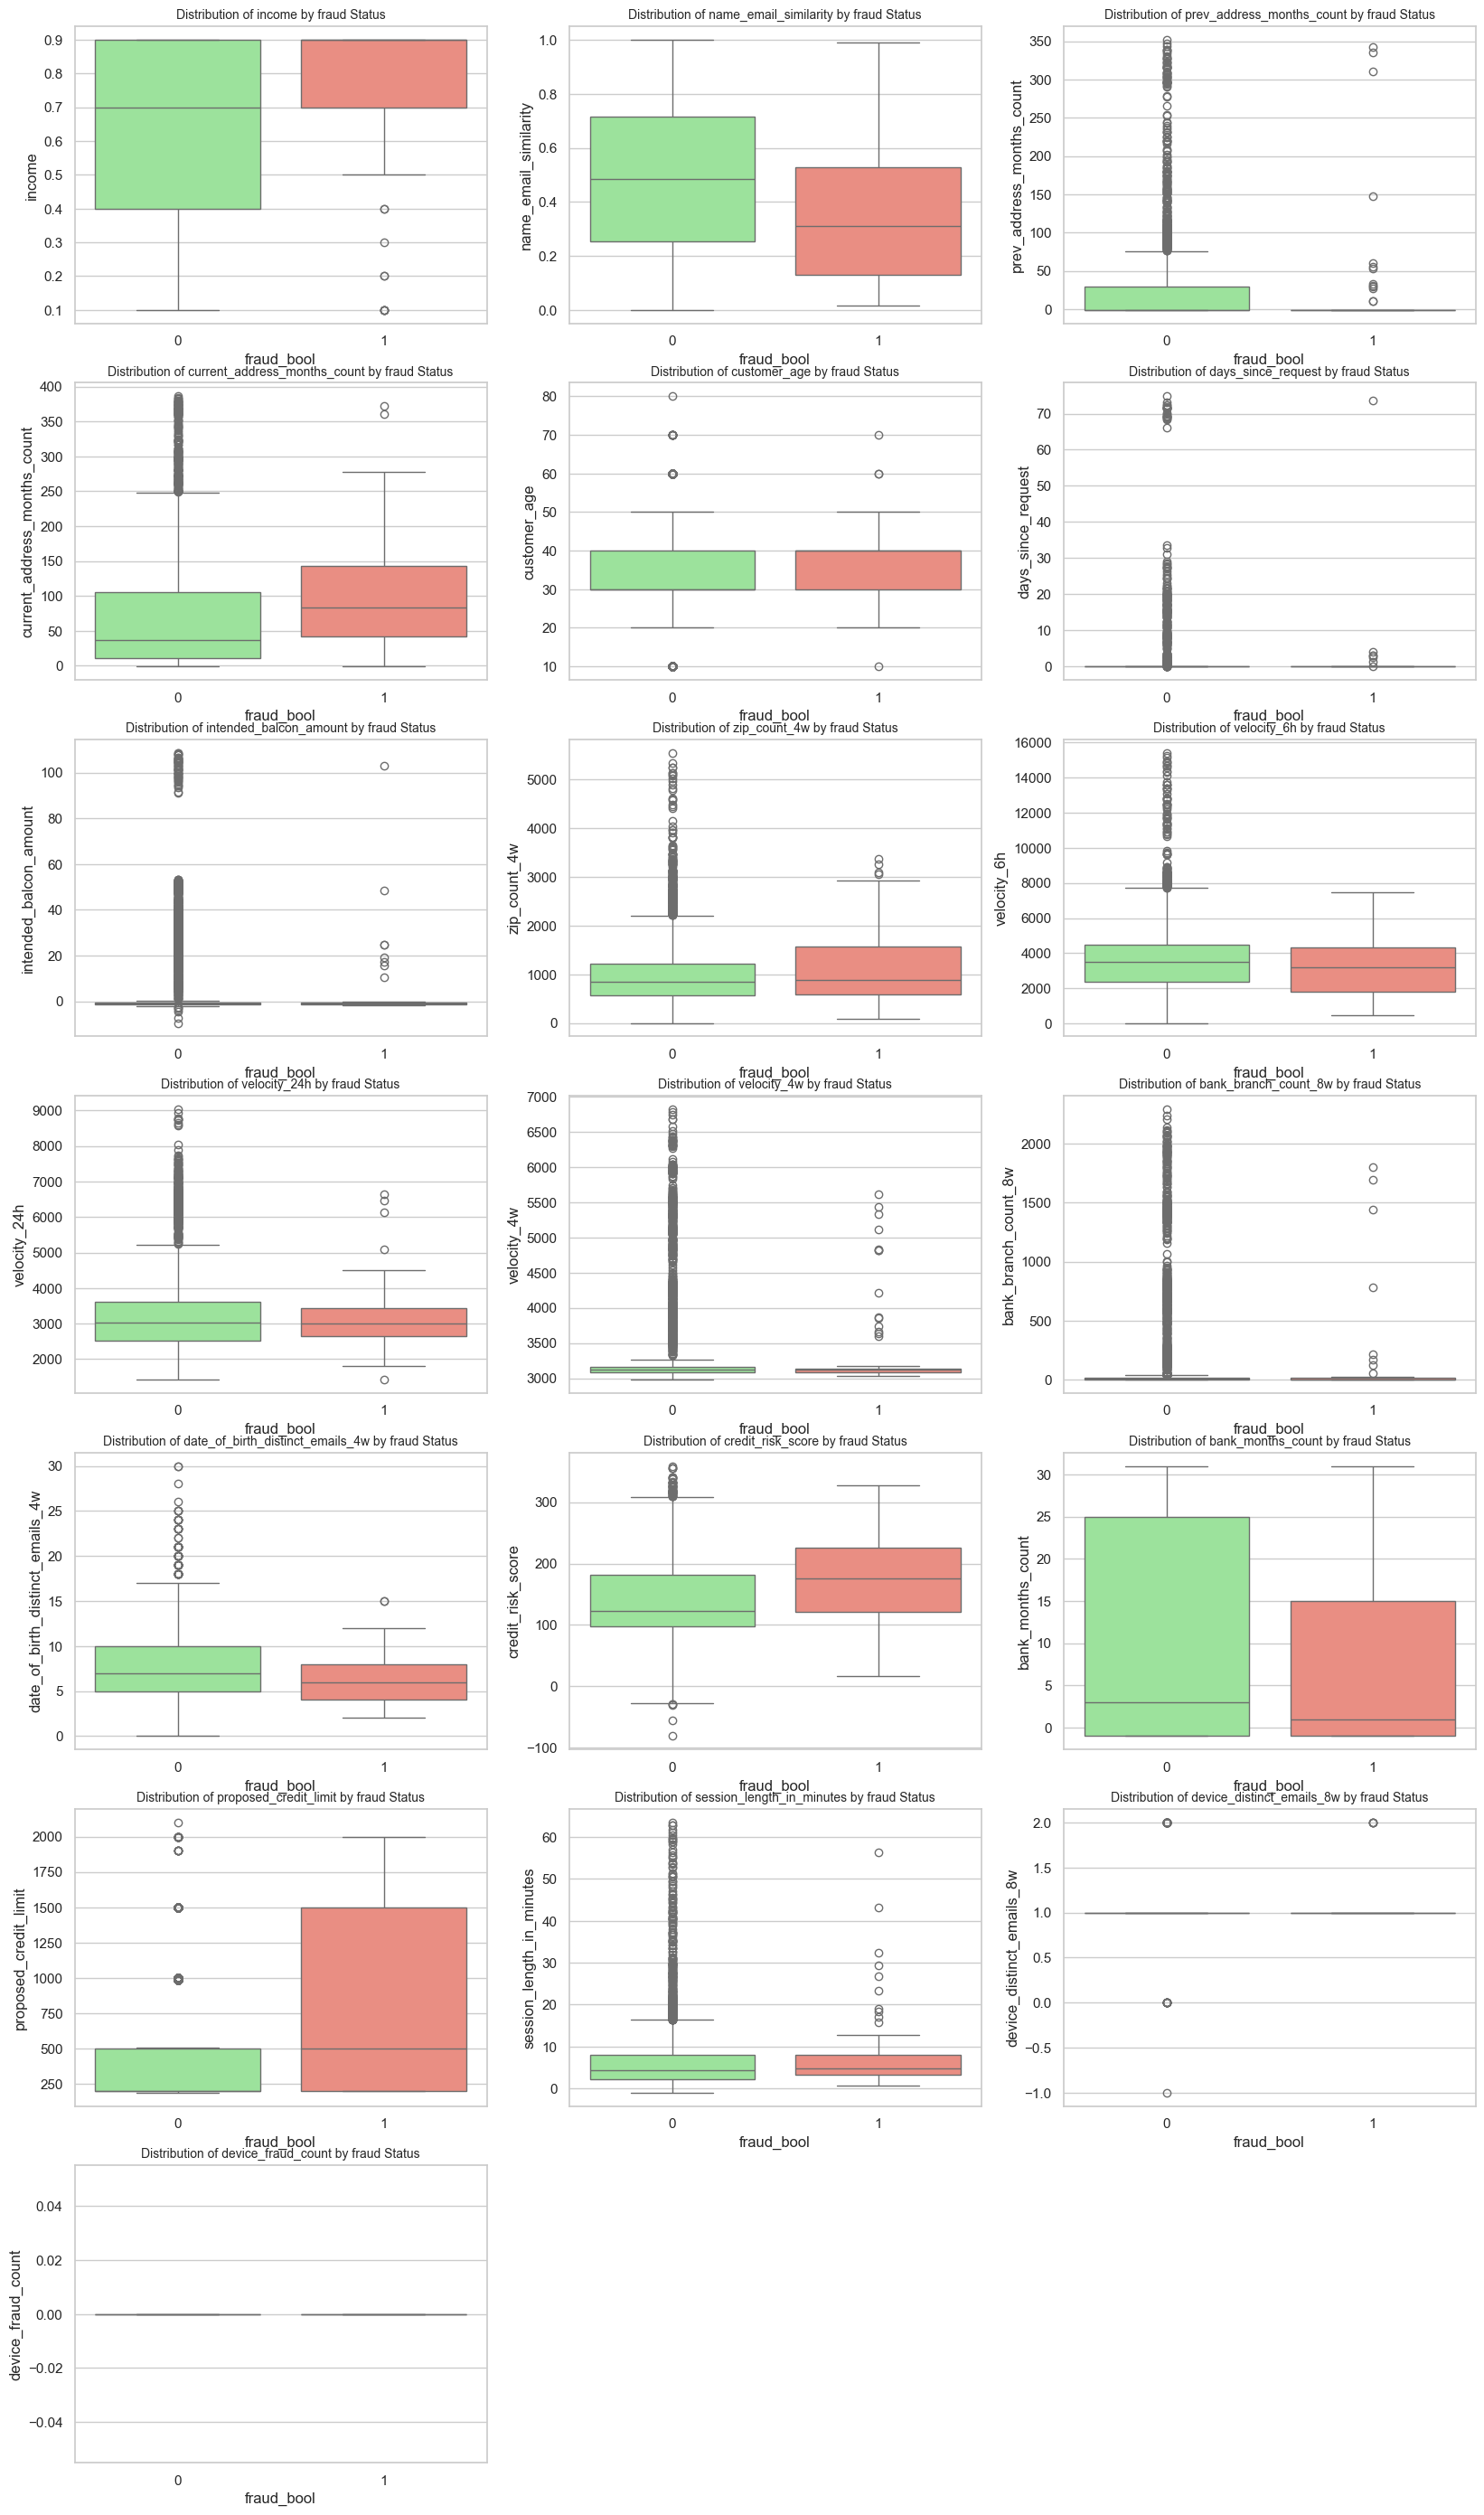

In [60]:
import math

n_num_features = len(num_features)
n_cols = 3
n_rows = math.ceil(n_num_features / n_cols)

# Color palette
colors = sns.color_palette('husl', n_num_features)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x='fraud_bool', y=feature, data=sampled, ax=axes[i], palette=['lightgreen', 'salmon'])
    
    axes[i].set_title(f'Distribution of {feature} by fraud Status', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=12)
    
#hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# plt.tight_layout()
plt.show()

- The median age for fraud group (1, red) looks higher than for the non-fraud group (0, green). This suggests fraud event from this sample tend to comes from older people on average

- The boxplot shows the median income-decile is higher for fraud (1) than for non-fraud (0). In plain terms: fraud appears more common among higher income-deciles in this sample.

- The median credit risk score (internal score for application risk) for group (1, red) looks higher than for the non-fraud group (0, green).

- The fraud group (1, red) has a much higher median and IQR for proposed_credit_limit than the non-fraud group (0, green). This suggests higher proposed credit limits are associated with higher fraud incidence in this dataset - but this is correlation, not causation

#### Numerical Features Correlation Matrix

<Axes: >

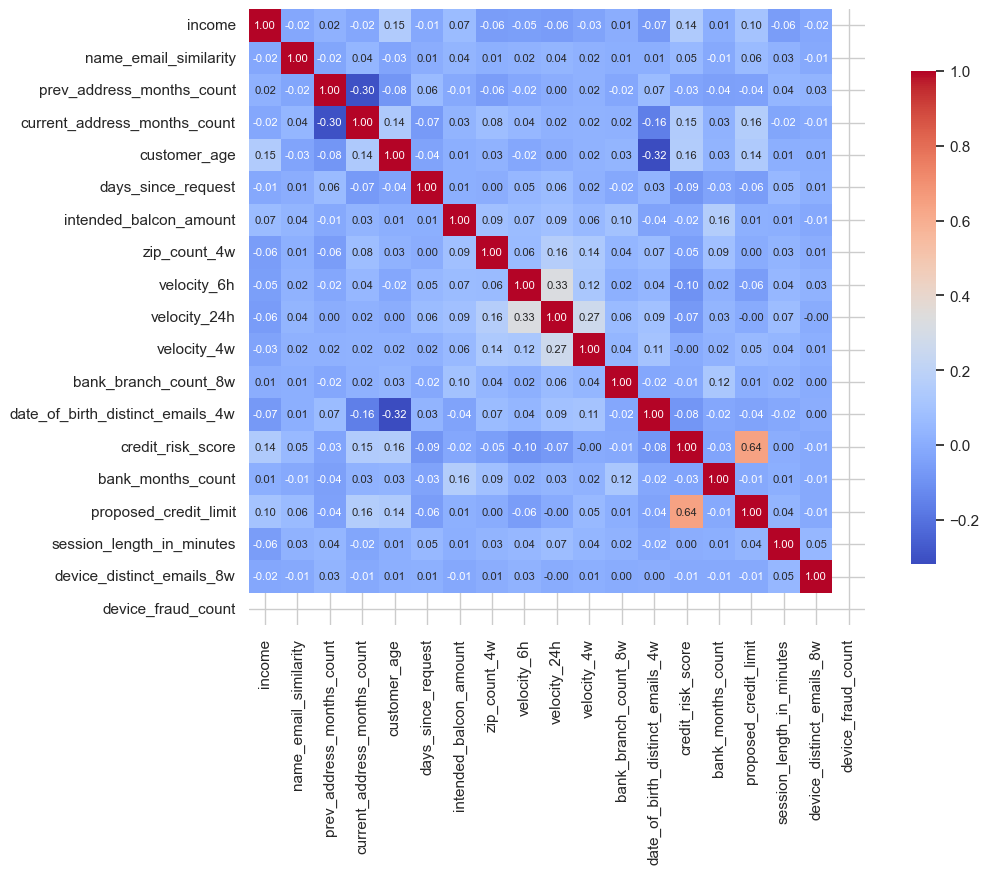

In [61]:
plt.figure(figsize=(12, 8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 8})

- There is a positive correlation (0.61) between proposed_credit_limit and credit_risk_score. This suggest that higher proposed_credit_limit with have a high credit risk score internally

### 4.2 Categorical Features Analysis

#### Fraud count by features categories

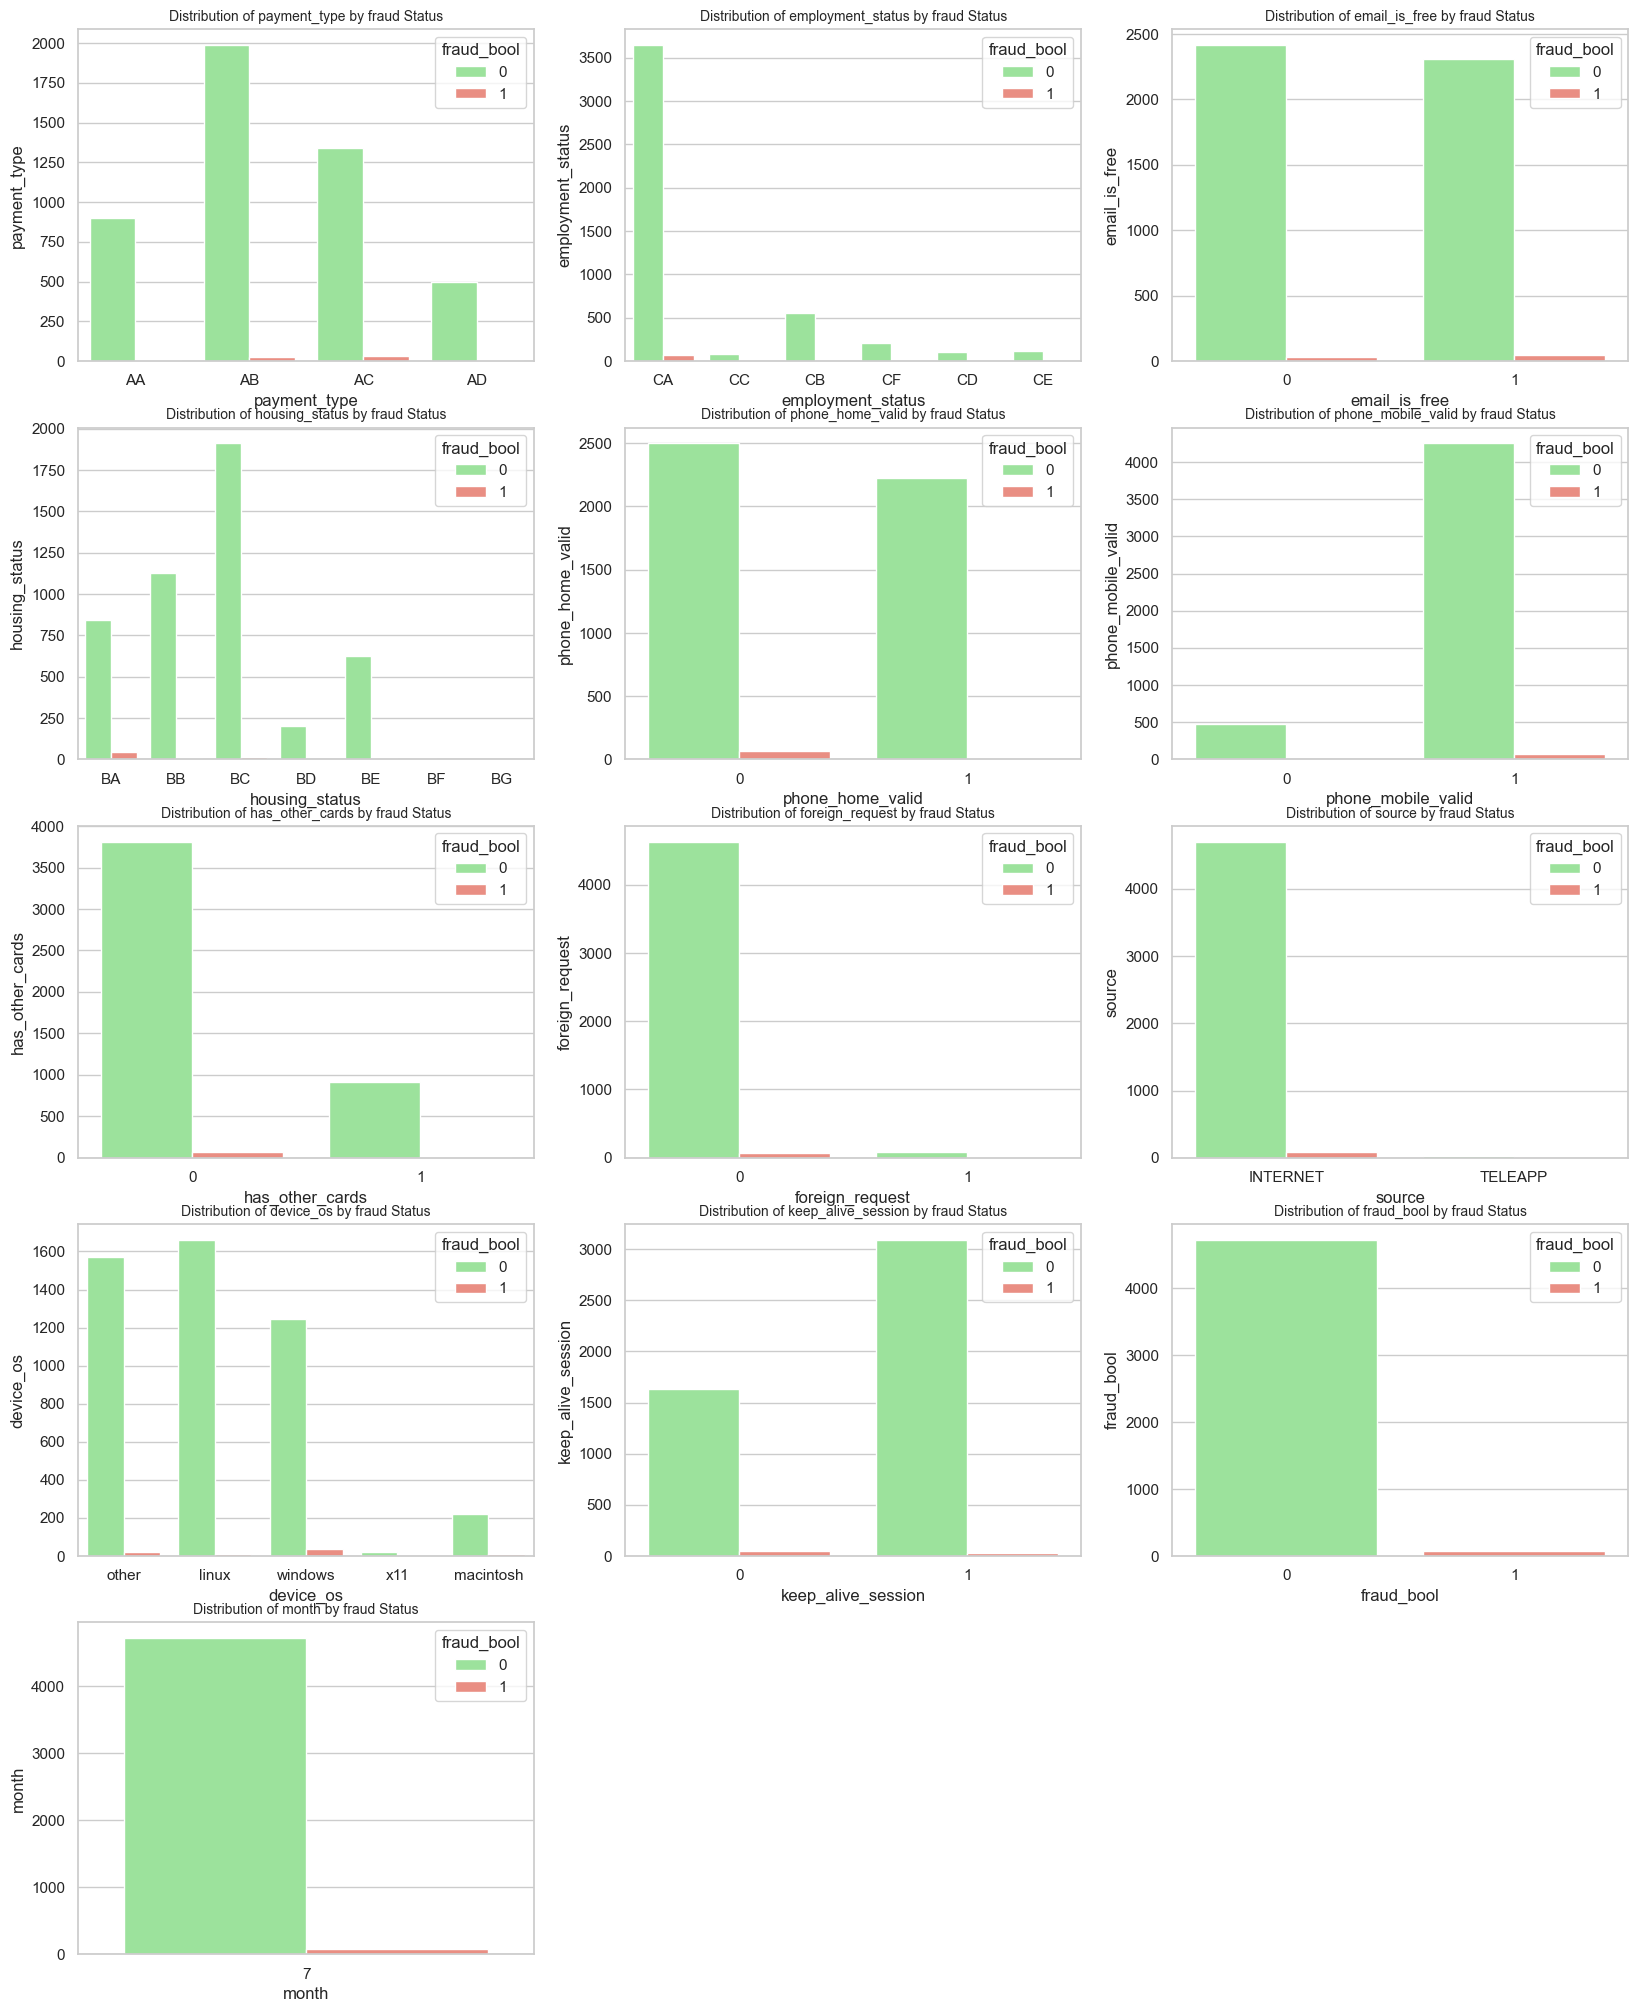

In [62]:
import math

n_cat_features = len(cat_features)
n_cols = 3
n_rows = math.ceil(n_cat_features / n_cols)

# Color palette
colors = sns.color_palette('husl', n_cat_features)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    # sns.boxplot(x='fraud_bool', y=feature, data=sampled, ax=axes[i], palette=['lightgreen', 'salmon'])
    sns.countplot(x=feature, hue='fraud_bool', data=sampled, ax=axes[i], palette=['lightgreen', 'salmon'])
    
    axes[i].set_title(f'Distribution of {feature} by fraud Status', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=12)
    
#hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# plt.tight_layout()
plt.show()

- Since the data is heavily imbalance, we will plot on the fraud response count for each feature category

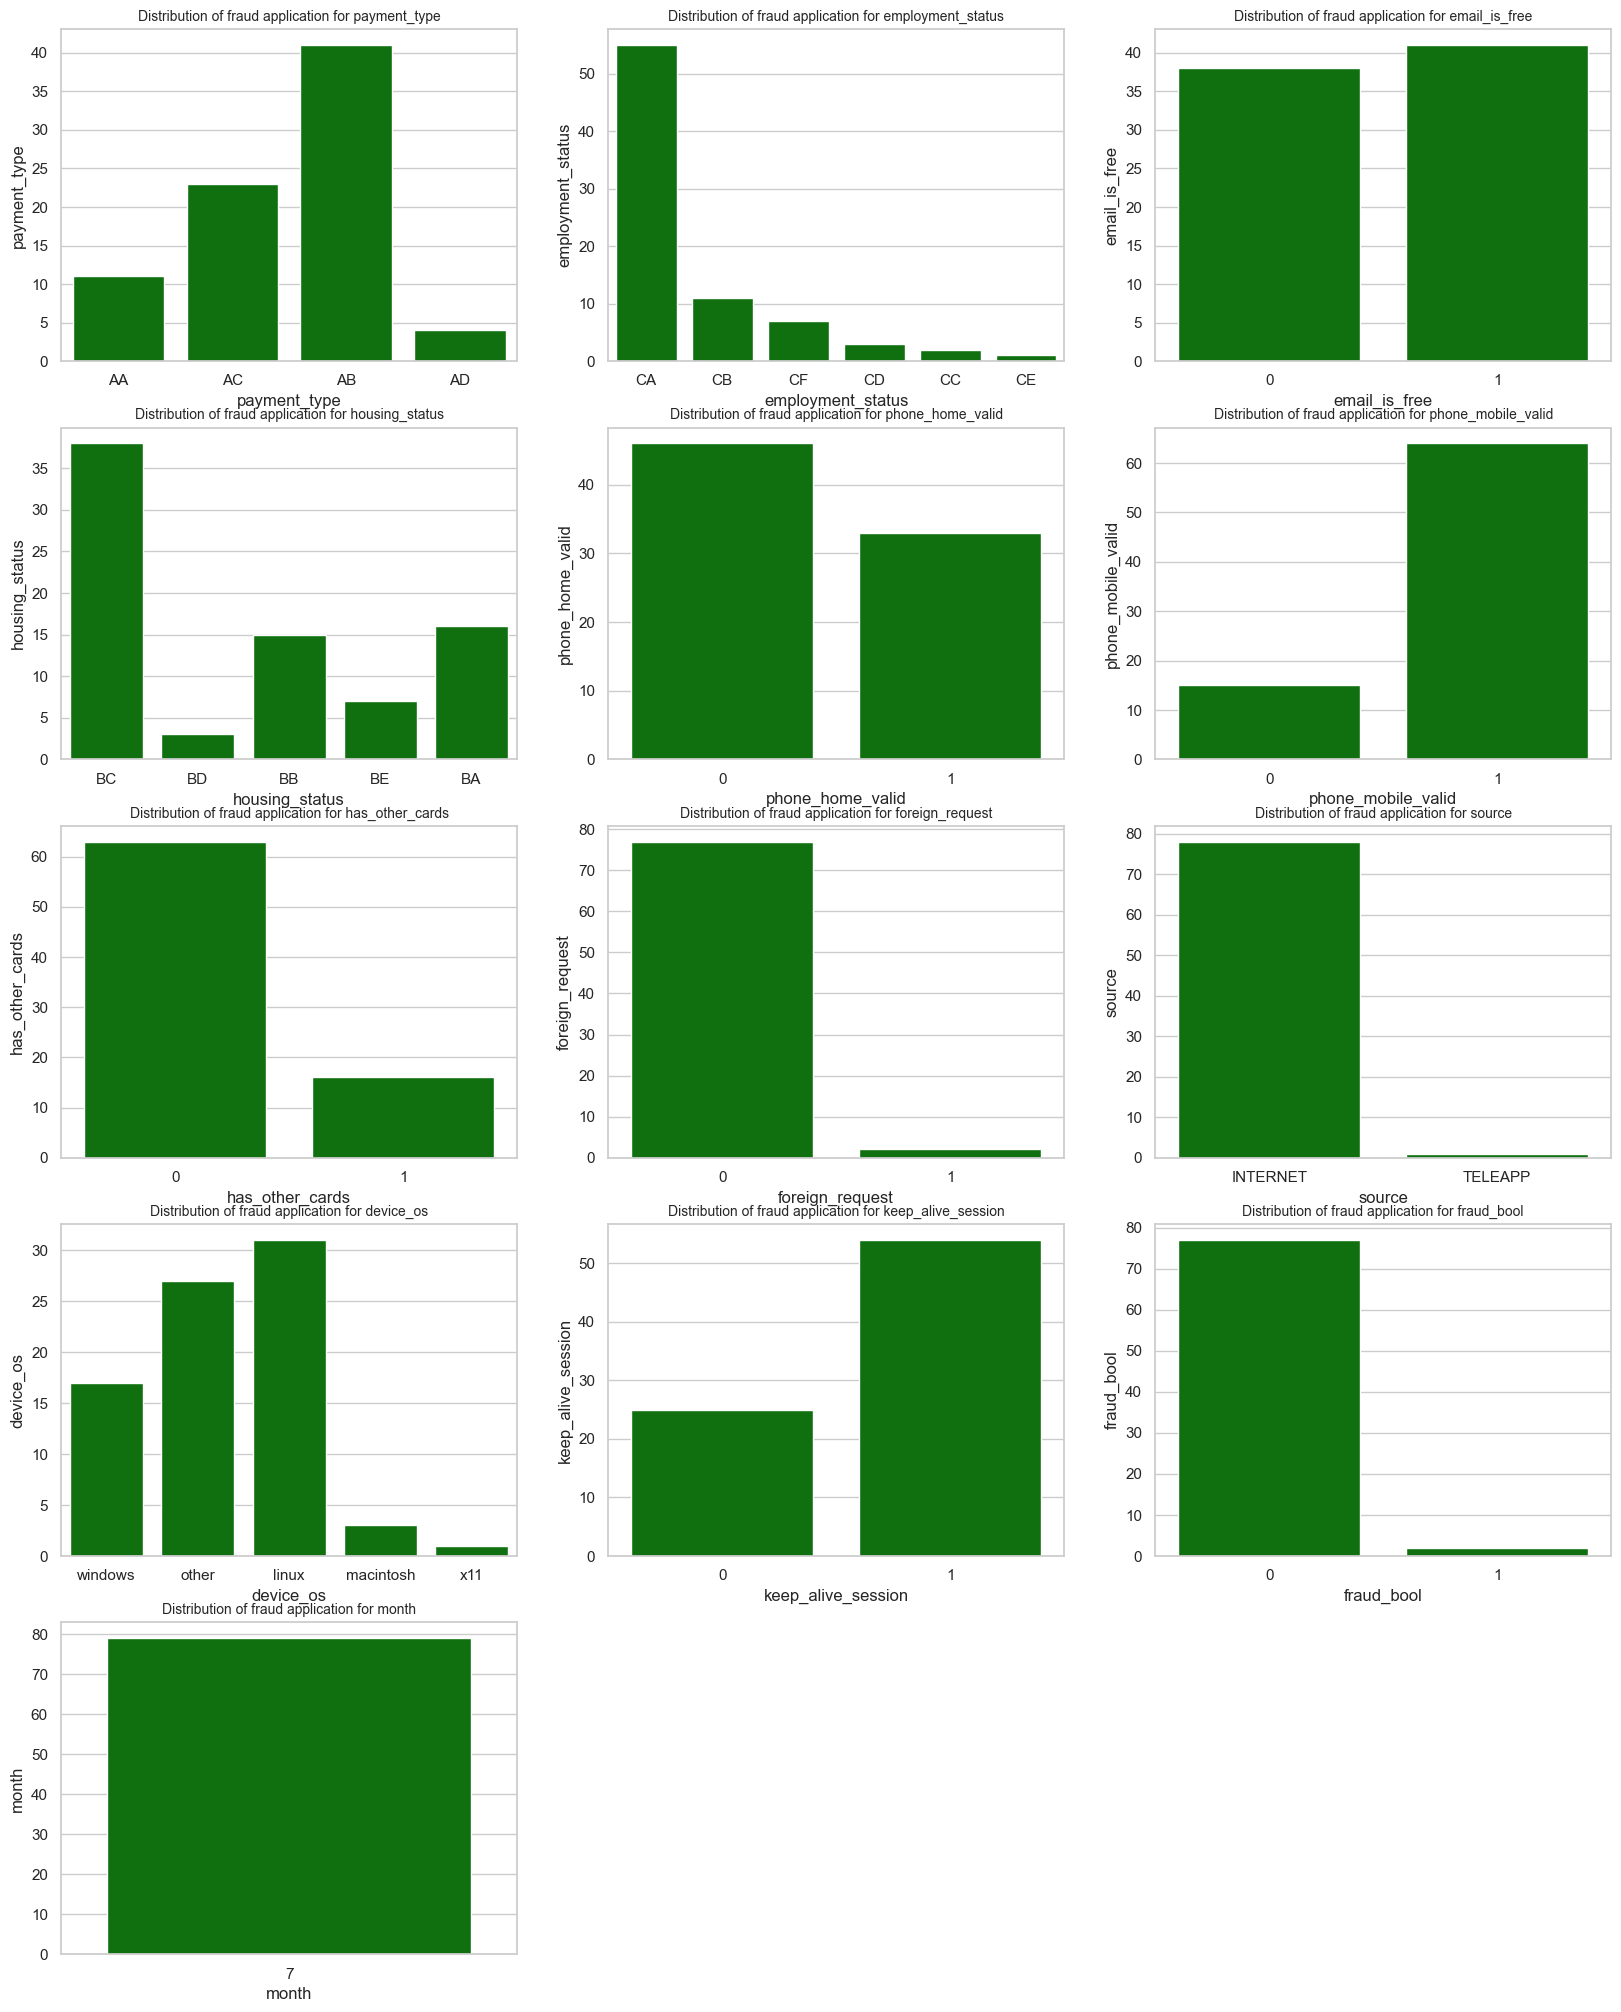

In [63]:
fraud_only = sampled[df['fraud_bool'] == 1]

#### Fraud count by features categories

n_cat_features = len(cat_features)
n_cols = 3
n_rows = math.ceil(n_cat_features / n_cols)

# Color palette
colors = sns.color_palette('husl', n_cat_features)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    # sns.boxplot(x='fraud_bool', y=feature, data=sampled, ax=axes[i], palette=['lightgreen', 'salmon'])
    sns.countplot(x=feature, data=fraud_only, ax=axes[i], palette=['green'])
    
    axes[i].set_title(f'Distribution of fraud application for {feature}', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=12)
    
#hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# plt.tight_layout()
plt.show()

#### 4.2.1 payment_type

- AB has the most fraud applications, followed by AA, AC, and AD (AD is lowest).
- Absolute counts only tell you where fraud occurs most, not which payment types are riskiest. A high-count type could simply the most common type overall. To decide risk, we will compute fraud rate = fraud_count / total_count for each payment_type

##### Fraud rate by payment_type

In [64]:
ct = pd.crosstab(df['payment_type'], df['fraud_bool']).rename(columns={0:'nonfraud',1:'fraud'})
ct['total'] = ct.sum(axis=1)
ct['fraud_rate'] = ct['fraud'] / ct['total']
ct['relative_fraud_rate'] = ct['fraud_rate'] / (len(fraud) / len(df))
ct=ct.sort_values('fraud_rate', ascending=False)
ct

fraud_bool,nonfraud,fraud,total,fraud_rate,relative_fraud_rate
payment_type,,,,,
AC,2631,59,2690,0.021933,1.332782
AB,3964,69,4033,0.017109,1.039633
AD,1063,18,1081,0.016651,1.011827
AA,1785,12,1797,0.006678,0.405782


Absolute differences vs overall:

AC is +0.5669 percentage points above baseline (1.67% vs 1.10%).

AA is -0.5747 pts below baseline.

Odds-ratio rough (AC vs overall): ≈1.5 (i.e., applicants with AC have ~50% higher odds than average).
Bottom line: AC shows the largest uplift from baseline; AB/AD are near baseline; AA/AE are substantially below.

##### Visual: Fraud-rate bar chart (actionable)

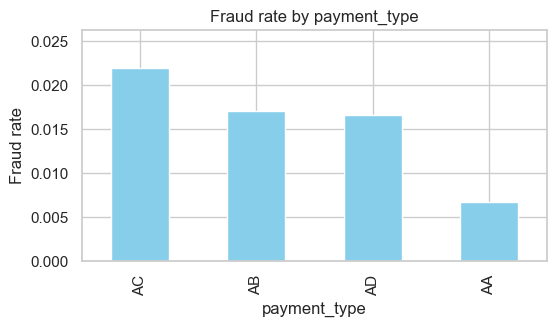

In [65]:
rates = ct.sort_values('fraud_rate', ascending=False)
rates['fraud_rate'].plot(kind='bar', figsize=(6,3), color='skyblue')
plt.ylabel('Fraud rate'); plt.title('Fraud rate by payment_type'); plt.ylim(0, rates['fraud_rate'].max()*1.2)
plt.show()

##### Check time stability 

In [1]:
monthly = df.groupby(['month','payment_type'])['fraud_bool'].mean().unstack()
monthly.plot(figsize=(10,4)); plt.title('Monthly fraud rate by payment_type')
plt.ylabel('fraud rate'); plt.xlabel('month'); plt.legend(title='payment_type');

NameError: name 'df' is not defined

- monthly fraud rate stable over time

#### Quick model check: AUC with vs without payment_type

Why: shows recruiters that you validated the feature’s predictive value (simple, defensible).

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# pick a few numeric features 
feats_base = ['income','customer_age','proposed_credit_limit']
X_base = df[feats_base].fillna(0)
X_with = pd.get_dummies(df[['payment_type']].join(X_base), drop_first=True).fillna(0)
y = df['fraud_bool'].astype(int)

Xtr, Xte, ytr, yte = train_test_split(X_base, y, test_size=0.3, random_state=42, stratify=y)
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(Xtr, ytr)
auc_base = roc_auc_score(yte, clf.predict_proba(Xte)[:,1])

Xtr2, Xte2, _, _ = train_test_split(X_with, y, test_size=0.3, random_state=42, stratify=y)
clf2 = LogisticRegression(max_iter=1000, class_weight='balanced')
clf2.fit(Xtr2, ytr)
auc_with = roc_auc_score(yte, clf2.predict_proba(Xte2)[:,1])

print(f"AUC without payment_type: {auc_base:.4f}")
print(f"AUC with payment_type:    {auc_with:.4f}")


AUC without payment_type: 0.7039
AUC with payment_type:    0.6930


- AUC improved from 0.7288 to 0.7483 when adding payment_type

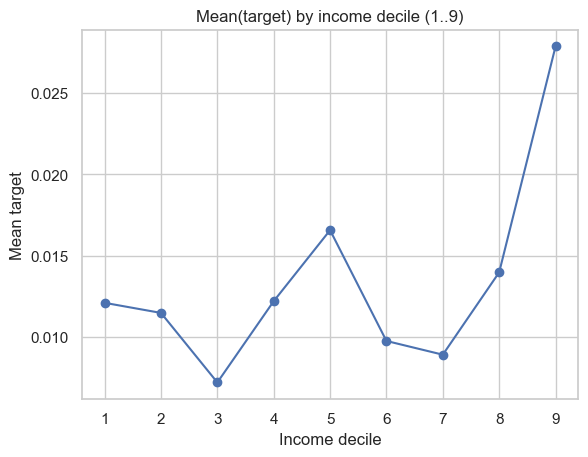

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# assume df has columns 'income_decile' (values like 0.1,0.2..0.9) and 'target' (0/1)
df = df.copy()
# map 0.1..0.9 to integers 1..9
df['income_ord'] = (df['income'] * 10).astype(int)  # 0.1*10=1, 0.9*10=9

# 1) diagnostic: mean target by decile
means = df.groupby('income_ord')['fraud_bool'].mean()
counts = df.groupby('income_ord').size()
means.plot(marker='o')
plt.title('Mean(target) by income decile (1..9)')
plt.xlabel('Income decile')
plt.ylabel('Mean target')
plt.show()


In [69]:
df[df["income"] == 0.9]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,income_ord
1,0,0.9,0.175046,115,13,50,0.014934,-1.053090,AC,531,...,200.0,0,INTERNET,0.678599,linux,1,1,0,7,9
4,0,0.9,0.150138,-1,66,40,0.000606,50.187050,AA,1869,...,200.0,0,INTERNET,2.879535,other,1,1,0,7,9
10,0,0.9,0.796752,-1,21,40,0.007911,-0.863652,AB,314,...,200.0,0,INTERNET,2.869472,windows,0,1,0,7,9
15,0,0.9,0.354365,-1,40,20,15.159913,4.400065,AA,821,...,200.0,0,INTERNET,15.828343,windows,0,1,0,7,9
17,0,0.9,0.256297,-1,143,50,0.010082,51.498412,AA,1192,...,200.0,0,INTERNET,5.469475,linux,0,1,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9589,0,0.9,0.705920,-1,28,60,0.002090,34.084440,AA,1997,...,500.0,0,INTERNET,5.953870,other,0,1,0,7,9
9591,0,0.9,0.746154,-1,206,40,0.030431,30.247766,AA,752,...,1000.0,0,INTERNET,2.043862,windows,0,1,0,7,9
9593,0,0.9,0.746749,55,13,20,0.021765,-0.634843,AB,690,...,500.0,0,INTERNET,1.399346,linux,1,1,0,7,9
9597,0,0.9,0.812885,52,3,20,0.008188,-0.758705,AB,2018,...,500.0,0,INTERNET,7.745428,other,1,1,0,7,9


## PCA Analysis

In [70]:
from sklearn.decomposition import PCA

In [71]:
df 

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,income_ord
0,0,0.7,0.559248,11,0,20,4.849171,-1.177439,AC,466,...,1000.0,0,INTERNET,1.751287,other,1,1,0,7,7
1,0,0.9,0.175046,115,13,50,0.014934,-1.053090,AC,531,...,200.0,0,INTERNET,0.678599,linux,1,1,0,7,9
2,0,0.8,0.644048,-1,55,30,0.022027,-1.028263,AB,1589,...,200.0,0,INTERNET,5.947965,other,0,1,0,7,8
3,0,0.6,0.580471,-1,53,30,0.000896,-1.209908,AB,1792,...,1500.0,0,INTERNET,3.843488,windows,0,1,0,7,6
4,0,0.9,0.150138,-1,66,40,0.000606,50.187050,AA,1869,...,200.0,0,INTERNET,2.879535,other,1,1,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,0,0.5,0.360509,96,30,30,0.014479,-1.352246,AB,459,...,200.0,0,INTERNET,30.574708,other,0,1,0,7,5
9597,0,0.9,0.812885,52,3,20,0.008188,-0.758705,AB,2018,...,500.0,0,INTERNET,7.745428,other,1,1,0,7,9
9598,0,0.6,0.074149,-1,78,50,0.024738,-0.816677,AB,1267,...,200.0,0,INTERNET,3.451344,windows,1,1,0,7,6
9599,0,0.9,0.320873,-1,28,40,0.010136,-1.224612,AC,936,...,1000.0,0,INTERNET,2.509625,macintosh,1,1,0,7,9
